In [56]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.cluster import KMeans

import warnings
warnings.filterwarnings('ignore')

In [57]:
df=pd.read_csv('Transaction.csv')
df

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.00,160296.36,M1979787155,0.00,0.00,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.00,19384.72,M2044282225,0.00,0.00,0,0
2,1,TRANSFER,181.00,C1305486145,181.00,0.00,C553264065,0.00,0.00,1,0
3,1,CASH_OUT,181.00,C840083671,181.00,0.00,C38997010,21182.00,0.00,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.00,29885.86,M1230701703,0.00,0.00,0,0
...,...,...,...,...,...,...,...,...,...,...,...
6362615,743,CASH_OUT,339682.13,C786484425,339682.13,0.00,C776919290,0.00,339682.13,1,0
6362616,743,TRANSFER,6311409.28,C1529008245,6311409.28,0.00,C1881841831,0.00,0.00,1,0
6362617,743,CASH_OUT,6311409.28,C1162922333,6311409.28,0.00,C1365125890,68488.84,6379898.11,1,0
6362618,743,TRANSFER,850002.52,C1685995037,850002.52,0.00,C2080388513,0.00,0.00,1,0


In [58]:
df.shape

(6362620, 11)

In [59]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 11 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int64  
 1   type            object 
 2   amount          float64
 3   nameOrig        object 
 4   oldbalanceOrg   float64
 5   newbalanceOrig  float64
 6   nameDest        object 
 7   oldbalanceDest  float64
 8   newbalanceDest  float64
 9   isFraud         int64  
 10  isFlaggedFraud  int64  
dtypes: float64(5), int64(3), object(3)
memory usage: 534.0+ MB


In [60]:
df.columns

Index(['step', 'type', 'amount', 'nameOrig', 'oldbalanceOrg', 'newbalanceOrig',
       'nameDest', 'oldbalanceDest', 'newbalanceDest', 'isFraud',
       'isFlaggedFraud'],
      dtype='object')

In [61]:
df.describe()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
count,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06
mean,2.433972e+02,1.798619e+05,8.338831e+05,8.551137e+05,1.100702e+06,1.224996e+06,1.290820e-03,2.514687e-06
std,1.423320e+02,6.038582e+05,2.888243e+06,2.924049e+06,3.399180e+06,3.674129e+06,3.590480e-02,1.585775e-03
min,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.560000e+02,1.338957e+04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,2.390000e+02,7.487194e+04,1.420800e+04,0.000000e+00,1.327057e+05,2.146614e+05,0.000000e+00,0.000000e+00
75%,3.350000e+02,2.087215e+05,1.073152e+05,1.442584e+05,9.430367e+05,1.111909e+06,0.000000e+00,0.000000e+00
max,7.430000e+02,9.244552e+07,5.958504e+07,4.958504e+07,3.560159e+08,3.561793e+08,1.000000e+00,1.000000e+00


In [62]:
df.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


In [63]:
df.tail()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
6362615,743,CASH_OUT,339682.13,C786484425,339682.13,0.0,C776919290,0.00,339682.13,1,0
6362616,743,TRANSFER,6311409.28,C1529008245,6311409.28,0.0,C1881841831,0.00,0.00,1,0
6362617,743,CASH_OUT,6311409.28,C1162922333,6311409.28,0.0,C1365125890,68488.84,6379898.11,1,0
6362618,743,TRANSFER,850002.52,C1685995037,850002.52,0.0,C2080388513,0.00,0.00,1,0
6362619,743,CASH_OUT,850002.52,C1280323807,850002.52,0.0,C873221189,6510099.11,7360101.63,1,0


In [64]:
df.isnull().sum()

step              0
type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
isFlaggedFraud    0
dtype: int64

In [65]:
df.duplicated()

0          False
1          False
2          False
3          False
4          False
           ...  
6362615    False
6362616    False
6362617    False
6362618    False
6362619    False
Length: 6362620, dtype: bool

In [66]:
df.select_dtypes(include=[np.number]).corr()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
step,1.000000,0.022373,-0.010058,-0.010299,0.027665,0.025888,0.031578,0.003277
amount,0.022373,1.000000,-0.002762,-0.007861,0.294137,0.459304,0.076688,0.012295
oldbalanceOrg,-0.010058,-0.002762,1.000000,0.998803,0.066243,0.042029,0.010154,0.003835
newbalanceOrig,-0.010299,-0.007861,0.998803,1.000000,0.067812,0.041837,-0.008148,0.003776
oldbalanceDest,0.027665,0.294137,0.066243,0.067812,1.000000,0.976569,-0.005885,-0.000513
newbalanceDest,0.025888,0.459304,0.042029,0.041837,0.976569,1.000000,0.000535,-0.000529
isFraud,0.031578,0.076688,0.010154,-0.008148,-0.005885,0.000535,1.000000,0.044109
isFlaggedFraud,0.003277,0.012295,0.003835,0.003776,-0.000513,-0.000529,0.044109,1.000000


In [67]:
df.nunique()

step                  743
type                    5
amount            5316900
nameOrig          6353307
oldbalanceOrg     1845844
newbalanceOrig    2682586
nameDest          2722362
oldbalanceDest    3614697
newbalanceDest    3555499
isFraud                 2
isFlaggedFraud          2
dtype: int64

In [68]:
df = df.drop(['nameOrig', 'nameDest'], axis=1)

In [69]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['type'] = le.fit_transform(df['type'])


In [70]:
from sklearn.preprocessing import StandardScaler

numerical_cols = ['amount','oldbalanceOrg','newbalanceOrig',
                  'oldbalanceDest','newbalanceDest']

scaler = StandardScaler()
df[numerical_cols] = scaler.fit_transform(df[numerical_cols])
df.shape
df.head()

,step,type,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,3,-0.281560,-0.229810,-0.237622,-0.323814,-0.333411,0,0
1,1,3,-0.294767,-0.281359,-0.285812,-0.323814,-0.333411,0,0
2,1,4,-0.297555,-0.288654,-0.292442,-0.323814,-0.333411,1,0
3,1,1,-0.297555,-0.288654,-0.292442,-0.317582,-0.333411,1,0
4,1,3,-0.278532,-0.274329,-0.282221,-0.323814,-0.333411,0,0


In [71]:
df['isFraud'].unique(), df['isFlaggedFraud'].unique()

(array([0, 1]), array([0, 1]))

In [72]:
df.loc[743]

step              1.000000
type              3.000000
amount           -0.278178
oldbalanceOrg    -0.288716
newbalanceOrig   -0.292442
oldbalanceDest   -0.323814
newbalanceDest   -0.333411
isFraud           0.000000
isFlaggedFraud    0.000000
Name: 743, dtype: float64

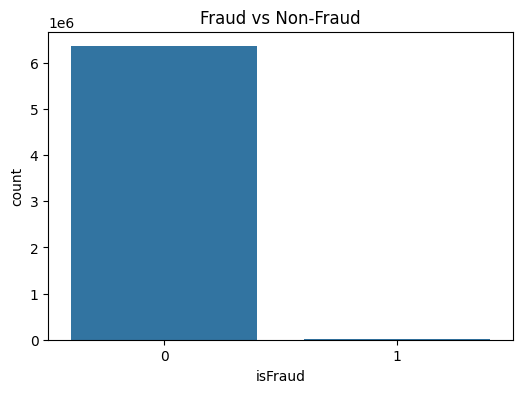

In [73]:
#Fraud vs Non-Fraud Count Plot
plt.figure(figsize=(6,4))
sns.countplot(data=df, x='isFraud')
plt.title("Fraud vs Non-Fraud")
plt.show()

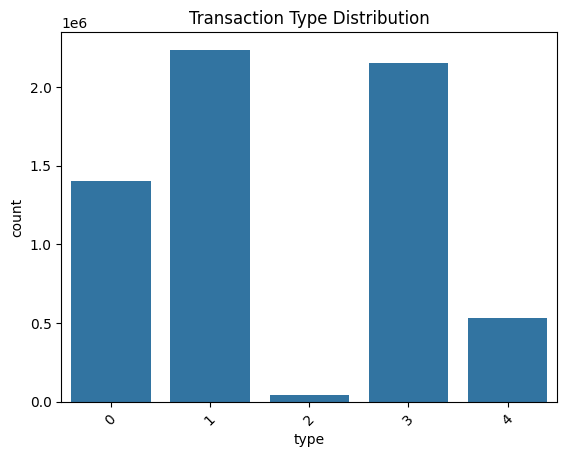

In [74]:
#Transaction Types Distrplt.figure(figsize=(6,4))
sns.countplot(data=df, x='type')
plt.title("Transaction Type Distribution")
plt.xticks(rotation=45)
plt.show()

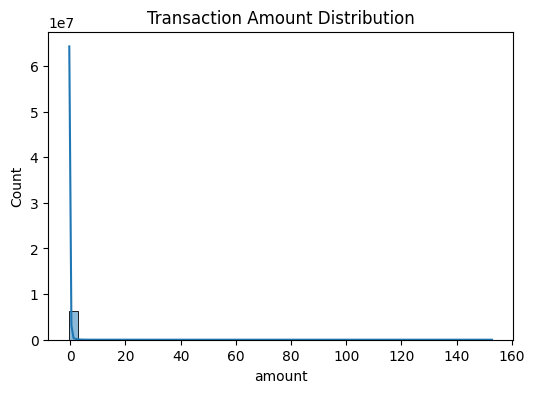

In [75]:
#Amount Distribution
plt.figure(figsize=(6,4))
sns.histplot(df['amount'], bins=50, kde=True)
plt.title("Transaction Amount Distribution")
plt.show()


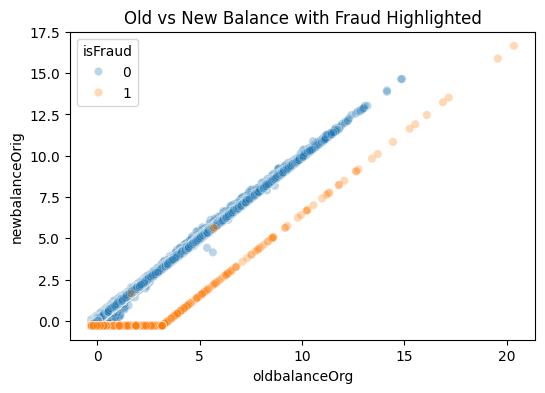

In [76]:
#Balance Before vs After Transaction
plt.figure(figsize=(6,4))
sns.scatterplot(data=df, x='oldbalanceOrg', y='newbalanceOrig', hue='isFraud', alpha=0.3)
plt.title("Old vs New Balance with Fraud Highlighted")
plt.show()

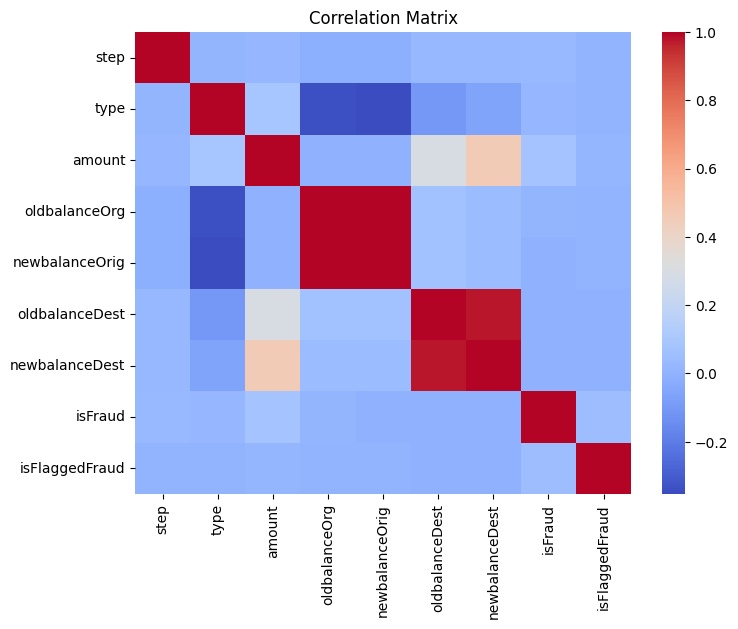

In [77]:
#Correlation Heatmap
plt.figure(figsize=(8,6))
sns.heatmap(df.corr(), annot=False, cmap='coolwarm')
plt.title("Correlation Matrix")
plt.show()

In [78]:
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import IsolationForest
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score
from sklearn.decomposition import PCA

In [79]:
# 1) CONFIG / MEMORY-FRIENDLY SAMPLING
RANDOM_STATE = 42
SAMPLE_FOR_TRAIN = False       # set True to train on a smaller sample if memory/time constrained
TRAIN_SAMPLE_SIZE = 200_000    # adjust based on your machine
SEED = RANDOM_STATE

In [80]:
# 2) FEATURE SELECTION
drop_cols = ['nameOrig', 'nameDest']    # ID-like columns
cat_cols = ['type']
num_cols = ['step','amount','oldbalanceOrg','newbalanceOrig','oldbalanceDest','newbalanceDest']
target_col = 'isFraud'   # ONLY used for evaluation (unsupervised modeling still)

In [81]:
# create a workspace copy (so you can re-run safely)
dfw = df.copy()

# drop ids
for c in drop_cols:
    if c in dfw.columns:
        dfw.drop(columns=c, inplace=True)

In [82]:
# encode categorical
le = LabelEncoder()
dfw['type'] = le.fit_transform(dfw['type'].astype(str))

In [83]:
# optional sampling for speed 
if SAMPLE_FOR_TRAIN:
    train_df = dfw.sample(n=TRAIN_SAMPLE_SIZE, random_state=SEED)
else:
    train_df = dfw

In [84]:
# 3) SCALE NUMERICALS
scaler = StandardScaler()
train_df[num_cols] = scaler.fit_transform(train_df[num_cols])

# 4) PREP X and y (y only for evaluation)
X_train = train_df[num_cols + cat_cols]
y_train = train_df[target_col].values

In [85]:
# 5) ISOLATION FOREST MODEL (tuned for big data)
# - max_samples: use a subset size for fast tree building (int) or 'auto'
# - contamination: estimated proportion of outliers (we can use the true mean for evaluation/tuning)
contamination_est = dfw[target_col].mean()  # use known label distribution for contamination setting
clf = IsolationForest(
    n_estimators=200,
    max_samples=100_000 if len(X_train) > 100_000 else "auto",
    contamination=contamination_est,
    n_jobs=-1,
    random_state=SEED,
    verbose=0
)

clf.fit(X_train)

,n_estimators,200
,max_samples,100000
,contamination,np.float64(0....0820448180152)
,max_features,1.0
,bootstrap,False
,n_jobs,-1
,random_state,42
,verbose,0
,warm_start,False


In [86]:
# 6) ANOMALY SCORES & PREDICTIONS
# decision_function: higher -> more normal; lower -> more anomalous
anomaly_score = -clf.decision_function(X_train)   # invert so higher = more anomalous (convenient)
pred_if = clf.predict(X_train)                     # 1 = normal, -1 = anomaly
y_pred = (pred_if == -1).astype(int)               # map to 1 for predicted fraud/anomaly

train_df['anomaly_score'] = anomaly_score
train_df['pred_if'] = y_pred


In [87]:
# 7) EVALUATION (since you have labels) — classification-like metrics
print("Contamination used:", contamination_est)
print("\nClassification report (IsolationForest as anomaly detector):")
print(classification_report(y_train, y_pred, digits=4))
print("\nConfusion Matrix (rows: true, cols: pred):")
print(confusion_matrix(y_train, y_pred))

Contamination used: 0.001290820448180152

Classification report (IsolationForest as anomaly detector):
              precision    recall  f1-score   support

           0     0.9989    0.9989    0.9989   6354407
           1     0.1151    0.1151    0.1151      8213

    accuracy                         0.9977   6362620
   macro avg     0.5570    0.5570    0.5570   6362620
weighted avg     0.9977    0.9977    0.9977   6362620


Confusion Matrix (rows: true, cols: pred):
[[6347139    7268]
 [   7268     945]]


In [88]:
# ROC AUC using anomaly_score (higher = more anomalous)
try:
    auc = roc_auc_score(y_train, anomaly_score)
    print(f"\nROC AUC (anomaly score vs isFraud): {auc:.4f}")
except Exception as e:
    print("ROC AUC could not be computed:", e)


ROC AUC (anomaly score vs isFraud): 0.8376


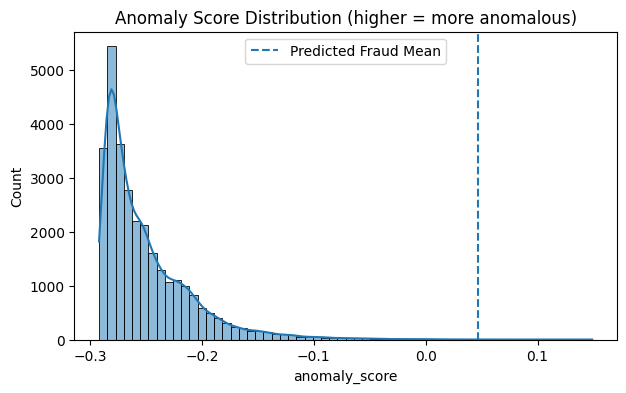

In [89]:
# 8) VISUAL INSIGHTS (sample for plotting to keep charts readable)
PLOT_SAMPLE = 30_000
vis_df = train_df.sample(n=min(PLOT_SAMPLE, len(train_df)), random_state=SEED)

# histogram: anomaly score
plt.figure(figsize=(7,4))
sns.histplot(vis_df['anomaly_score'], bins=60, kde=True)
plt.title("Anomaly Score Distribution (higher = more anomalous)")
plt.axvline(vis_df.loc[vis_df['pred_if']==1, 'anomaly_score'].mean(), linestyle='--', label='Predicted Fraud Mean')
plt.legend()
plt.show()

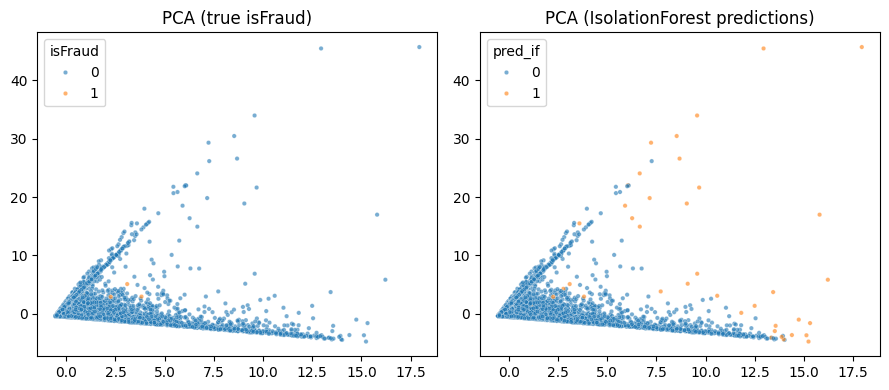

In [90]:
# PCA 2D scatter colored by true and predicted fraud (sampled)
pca = PCA(n_components=2, random_state=SEED)
pca_coords = pca.fit_transform(scaler.transform(vis_df[num_cols]))  # scale again just in case
plt.figure(figsize=(9,4))
plt.subplot(1,2,1)
sns.scatterplot(x=pca_coords[:,0], y=pca_coords[:,1], hue=vis_df[target_col], palette='tab10', s=10, alpha=0.6)
plt.title("PCA (true isFraud)")

plt.subplot(1,2,2)
sns.scatterplot(x=pca_coords[:,0], y=pca_coords[:,1], hue=vis_df['pred_if'], palette='tab10', s=10, alpha=0.6)
plt.title("PCA (IsolationForest predictions)")
plt.tight_layout()
plt.show()



In [91]:
# 9) Inspect top anomalous transactions
top_anomalies = train_df.sort_values('anomaly_score', ascending=False).head(20)
print("\nTop 20 anomalous transactions (sample):")
display_cols = num_cols + cat_cols + ['anomaly_score', 'pred_if', target_col]
print(top_anomalies[display_cols].head(20))


Top 20 anomalous transactions (sample):
             step      amount  oldbalanceOrg  newbalanceOrig  oldbalanceDest  \
3980217  0.376604   79.960690      -0.288716       -0.292442       77.030176   
4112117  0.411733   79.112921      -0.288716       -0.292442       70.455594   
3864129  0.278242   94.014727      -0.288716       -0.292442       56.283818   
6175038  2.252500    0.027372       3.202518        3.223206       96.227260   
4143417  0.418759  101.934364      -0.288716       -0.292442       55.389978   
4142336  0.418759   82.974869      -0.288716       -0.292442       58.726575   
3994504  0.383630   62.647165      -0.288716       -0.292442       64.817030   
6362452  3.418788   16.262325      19.555966       15.889321       -0.323814   
4133583  0.411733   50.439812      -0.288716       -0.292442       95.262497   
4146648  0.418759   59.509411      -0.288716       -0.292442       69.189881   
6362576  3.496072   16.262325      15.525243       11.907955       -0.323814   

Notes:
- IsolationForest trained with contamination set to the observed fraud rate for evaluation/tuning.
- You may want to set SAMPLE_FOR_TRAIN=True when iterating quickly, then re-train on more data.
- Consider using feature engineering: time-window aggregations (rolling stats by origin/dest), ratio features (amount / oldbalanceOrg), and one-hot for 'type' if needed.
- For production: persist scaler + model (joblib.dump), and score new data with the same pipeline.